In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
import healpy as hp
from astropy.coordinates import SkyCoord
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import warnings
warnings.filterwarnings('ignore')

---

# 5, 10

In [6]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)#[::20].reset_index(drop=True)
df['i100'] = np.loadtxt('output/510/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/510/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/510/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/510/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/510/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/510/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/510/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/510/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/510/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/510/rr.csv',delimiter=', ')
# df['i12'] = np.loadtxt('output/510u/ir12.csv',delimiter=', ')
# df['i25'] = np.loadtxt('output/510u/ir25.csv',delimiter=', ')
# df['i60'] = np.loadtxt('output/510u/ir60.csv',delimiter=', ')
# df['i100'] = np.loadtxt('output/510u/ir100.csv',delimiter=', ')
df['cluster'] = 1

In [7]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/510/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/510/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/510/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/510/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/510/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/510/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/510/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/510/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/510/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/510/rv.csv',delimiter=', ')
# df2['i12'] = np.loadtxt('output/510u/iv12.csv',delimiter=', ')
# df2['i25'] = np.loadtxt('output/510u/iv25.csv',delimiter=', ')
# df2['i60'] = np.loadtxt('output/510u/iv60.csv',delimiter=', ')
# df2['i100'] = np.loadtxt('output/510u/iv100.csv',delimiter=', ')
df2['cluster'] = 0

In [8]:
df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

In [9]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

###################################################

# Planck low-freq
intensity_clusters_pl_low = df[['i100','i143','i217','i353']][::2]
intensity_voids_pl_low = df2[['i100','i143','i217','i353']][::2]
intensity_combined_pl_low = df3[['i100','i143','i217','i353']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['i100','i143','i217','i353','i545','i857']][::2]
intensity_voids_pl = df2[['i100','i143','i217','i353','i545','i857']][::2]
intensity_combined_pl = df3[['i100','i143','i217','i353','i545','i857']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
intensity_voids_pl_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
intensity_combined_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
cluster_tag_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# # Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
intensity_voids_pl_ros = df2[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
intensity_combined_pl_ros = df3[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

# ##########################################################################################################

# # Planck+IRIS
# intensity_clusters_pl_iris = df[['i100','i143','i217','i353','i545','i857', 'i12','i25','i60','i100']][::2]
# intensity_voids_pl_iris = df2[['i100','i143','i217','i353','i545','i857', 'i12','i25','i60','i100']][::2]
# intensity_combined_pl_iris = df3[['i100','i143','i217','i353','i545','i857', 'i12','i25','i60','i100']][::2]
# cluster_tag_pl_iris = df3['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_pl_iris = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_pl_iris.fit(intensity_combined_pl_iris, cluster_tag_pl_iris)

# ##########################################################################################################

# # Planck+ROS+IRIS
# intensity_clusters_pl_ros_iris = df[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
# intensity_voids_pl_ros_iris = df2[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
# intensity_combined_pl_ros_iris = df3[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
# cluster_tag_pl_ros_iris = df3['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_pl_iris = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_pl_iris.fit(intensity_combined_pl_iris, cluster_tag_pl_iris)

########################################################################################################

# Full
intensity_clusters_full = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
intensity_voids_full = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
intensity_combined_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
cluster_tag_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [11]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090, i150, i220]]) for i090, i150, i220 in intensity_clusters_act[1::2].values]).flatten()

# Low-freq Planck
cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_clusters_pl_low[1::2].values]).flatten()

# Planck-only
cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters_pl[1::2].values]).flatten()

# Planck+ACT
cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_clusters_pl_act[1::2].values]).flatten()

# Planck+ROSAT
cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters_pl_ros[1::2].values]).flatten()

# Planck+ROSAT
# cluster_pl_iris = np.array([clf_pl_iris.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters_pl_iris[1::2].values]).flatten()

# Planck+ROSAT
# cluster_pl_iris = np.array([clf_pl_iris.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters_pl_ros_iris[1::2].values]).flatten()

# Full
cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters_full[1::2].values]).flatten()

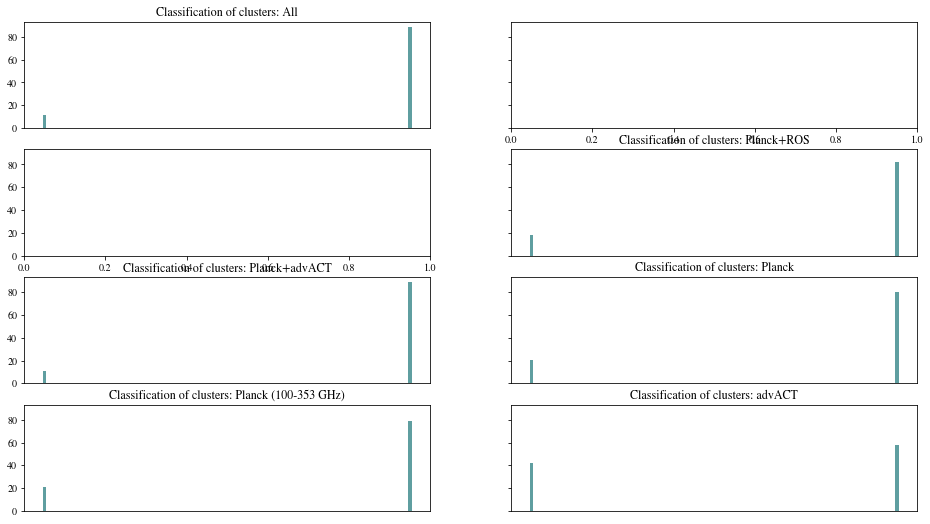

In [12]:
fig, ax = plt.subplots(4,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

# ax[0,1].hist(cluster_pl_iris,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+IRIS+ROS')
# ax[0,1].get_xaxis().set_visible(False)
# ax[0,1].set_title("Classification of clusters: Planck+IRIS+ROS")

# ax[1,0].hist(cluster_pl_iris,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+IRIS')
# ax[1,0].get_xaxis().set_visible(False)
# ax[1,0].set_title("Classification of clusters: Planck+IRIS")

ax[1,1].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[2,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: Planck")

ax[3,0].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[3,0].get_xaxis().set_visible(False)
ax[3,0].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[3,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[3,1].get_xaxis().set_visible(False)
ax[3,1].set_title("Classification of clusters: advACT")

# plt.savefig('output/classification_510.png')
plt.show()

In [36]:
dfsky = pd.read_csv('data/full_sky_decs.csv')[['decs']]
dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]
c = SkyCoord(dfsky['ras'],dfsky['decs'],frame='icrs',unit='deg')
dfsky['glat'] = c.galactic.b.degree
dfsky['glon'] = c.galactic.l.degree

dfsky['i100'] = np.loadtxt('output/510u/pf100.csv',delimiter=', ')
dfsky['i143'] = np.loadtxt('output/510u/pf143.csv',delimiter=', ')
dfsky['i217'] = np.loadtxt('output/510u/pf217.csv',delimiter=', ')
dfsky['i353'] = np.loadtxt('output/510u/pf353.csv',delimiter=', ')
dfsky['i545'] = np.loadtxt('output/510u/pf545.csv',delimiter=', ')
dfsky['i857'] = np.loadtxt('output/510u/pf857.csv',delimiter=', ')
dfsky['i090'] = np.loadtxt('output/510u/af90.csv',delimiter=', ')
dfsky['i150'] = np.loadtxt('output/510u/af150.csv',delimiter=', ')
dfsky['i220'] = np.loadtxt('output/510u/af220.csv',delimiter=', ')
dfsky['iros'] = np.loadtxt('output/510u/rf.csv',delimiter=', ')

In [37]:
dfsky[~dfsky.isin([-9999]).any(axis=1)]

,decs,ras,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,i220,iros
1600,-60.909091,0.000000,-55.116601,313.838356,0.000083,0.000066,0.000118,0.000557,-0.001911,-0.037074,2.168578,-114.551981,97.805715,0.000271
1601,-60.909091,3.636364,-55.646959,310.869718,-0.000189,-0.000184,-0.000137,0.000265,-0.035730,-0.055454,2.703167,73.576130,-65.618260,0.000622
1602,-60.909091,7.272727,-56.007941,307.788507,-0.000031,-0.000009,0.000061,0.000560,0.021546,0.042411,5.705049,-16.081831,173.731018,-0.000032
1603,-60.909091,10.909091,-56.193338,304.636170,0.000055,0.000063,0.000120,0.000580,-0.000242,0.014376,13.260036,73.918235,-15.309423,0.000587
1604,-60.909091,14.545455,-56.199863,301.458454,0.000011,0.000027,0.000095,0.000633,0.026731,0.052051,4.096581,-55.234927,-377.517711,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,20.909091,345.454545,-35.123802,91.217342,0.000119,0.000147,0.000359,0.002101,-0.371720,-1.081731,-3.011102,1.689346,-155.124656,0.000134
56196,20.909091,349.090909,-36.736027,94.910249,0.000113,0.000159,0.000365,0.002184,-0.244720,-0.706223,-26.836911,-15.366946,-87.125767,0.000312
56197,20.909091,352.727273,-38.159266,98.795738,0.000047,0.000049,0.000188,0.001438,0.050911,0.124444,45.717299,3.128490,35.592771,0.000066
56198,20.909091,356.363636,-39.377483,102.863160,0.000140,0.000164,0.000369,0.002110,0.262085,0.712150,80.488917,-84.028408,430.440107,0.000096


In [43]:
cluster_prob= np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, iros]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, iros in dfsky[['i100','i143','i217','i353', 'i545', 'i857', 'i090', 'i150', 'i220', 'iros']].values]).flatten()

In [44]:
dfsky['cluster']=cluster_prob

In [45]:
pl143 = hp.read_map('data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits')

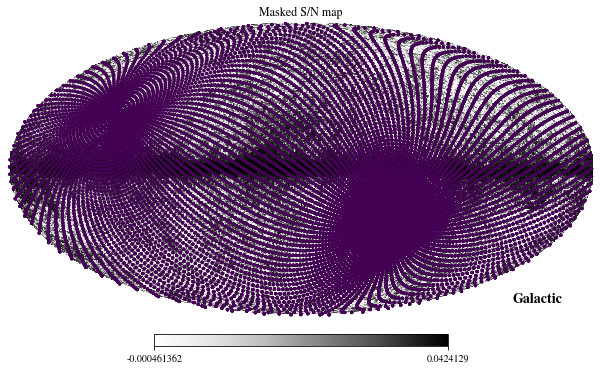

In [82]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(df['glon'],df['glat'],c='red',lonlat=True,s=0.01)
# hp.visufunc.projscatter(df2['glon'],df2['glat'],c='blue',lonlat=True,s=0.01)
hp.visufunc.projscatter(dfsky['glon'],dfsky['glat'],lonlat=True,c=dfsky.cluster,s=5)
# hp.visufunc.projscatter(dfsky[dfsky.cluster<0.5]['glon'],dfsky[dfsky.cluster<0.5]['glat'],lonlat=True,c="darkblue",s=5)
# hp.visufunc.projscatter(dfsky[dfsky.cluster>0.5]['glon'],dfsky[dfsky.cluster>0.5]['glat'],lonlat=True,c="magenta",s=5)
plt.scatter(dfsky['glon'],dfsky['glat'],c=dfsky.cluster,alpha=0,s=1)
# plt.scatter(df['glon'],df['glat'],c='r',s=1)
plt.savefig('output/fullsky.png')

---

---

---

----

# 5, 10 + Ring

In [14]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)#[::20]
df['i100'] = np.loadtxt('output/510/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/510/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/510/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/510/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/510/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/510/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/510/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/510/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/510/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/510/rr.csv',delimiter=', ')
# df['i12'] = np.loadtxt('output/510/ir12.csv',delimiter=', ')
# df['i25'] = np.loadtxt('output/510/ir25.csv',delimiter=', ')
# df['i60'] = np.loadtxt('output/510/ir60.csv',delimiter=', ')
# df['i100'] = np.loadtxt('output/510/ir100.csv',delimiter=', ')
df['i100_r'] = np.loadtxt('output/510/pr100_r.csv',delimiter=', ')
df['i143_r'] = np.loadtxt('output/510/pr143_r.csv',delimiter=', ')
df['i217_r'] = np.loadtxt('output/510/pr217_r.csv',delimiter=', ')
df['i353_r'] = np.loadtxt('output/510/pr353_r.csv',delimiter=', ')
df['i545_r'] = np.loadtxt('output/510/pr545_r.csv',delimiter=', ')
df['i857_r'] = np.loadtxt('output/510/pr857_r.csv',delimiter=', ')
df['i090_r'] = np.loadtxt('output/510/ar90_r.csv',delimiter=', ')
df['i150_r'] = np.loadtxt('output/510/ar150_r.csv',delimiter=', ')
df['i220_r'] = np.loadtxt('output/510/ar220_r.csv',delimiter=', ')
df['iros_r'] = np.loadtxt('output/510/rr_r.csv',delimiter=', ')
# df['i12_r'] = np.loadtxt('output/510/ir12_r.csv',delimiter=', ')
# df['i25_r'] = np.loadtxt('output/510/ir25_r.csv',delimiter=', ')
# df['i60_r'] = np.loadtxt('output/510/ir60_r.csv',delimiter=', ')
# df['i100_r'] = np.loadtxt('output/510/ir100_r.csv',delimiter=', ')
df['cluster'] = 1

In [17]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/510/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/510/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/510/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/510/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/510/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/510/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/510/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/510/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/510/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/510/rv.csv',delimiter=', ')
# df2['i12'] = np.loadtxt('output/510u/iv12.csv',delimiter=', ')
# df2['i25'] = np.loadtxt('output/510u/iv25.csv',delimiter=', ')
# df2['i60'] = np.loadtxt('output/510u/iv60.csv',delimiter=', ')
# df2['i100'] = np.loadtxt('output/510u/iv100.csv',delimiter=', ')
df2['i100_r'] = np.loadtxt('output/510/pv100_r.csv',delimiter=', ')
df2['i143_r'] = np.loadtxt('output/510/pv143_r.csv',delimiter=', ')
df2['i217_r'] = np.loadtxt('output/510/pv217_r.csv',delimiter=', ')
df2['i353_r'] = np.loadtxt('output/510/pv353_r.csv',delimiter=', ')
df2['i545_r'] = np.loadtxt('output/510/pv545_r.csv',delimiter=', ')
df2['i857_r'] = np.loadtxt('output/510/pv857_r.csv',delimiter=', ')
df2['i090_r'] = np.loadtxt('output/510/av90_r.csv',delimiter=', ')
df2['i150_r'] = np.loadtxt('output/510/av150_r.csv',delimiter=', ')
df2['i220_r'] = np.loadtxt('output/510/av220_r.csv',delimiter=', ')
df2['iros_r'] = np.loadtxt('output/510/rv_r.csv',delimiter=', ')
# df2['i12_r'] = np.loadtxt('output/510u/iv12_r.csv',delimiter=', ')
# df2['i25_r'] = np.loadtxt('output/510u/iv25_r.csv',delimiter=', ')
# df2['i60_r'] = np.loadtxt('output/510u/iv60_r.csv',delimiter=', ')
# df2['i100_r'] = np.loadtxt('output/510u/iv100_r.csv',delimiter=', ')
df2['cluster'] = 0

In [18]:
df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

In [19]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

###################################################

# Planck low-freq
intensity_clusters_pl_low = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
intensity_voids_pl_low = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
intensity_combined_pl_low = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
intensity_voids_pl = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
intensity_combined_pl = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
intensity_voids_pl_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
intensity_combined_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
cluster_tag_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_voids_pl_ros = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_combined_pl_ros = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

# ##########################################################################################################

# # Planck+IRIS
# intensity_clusters_pl_iris = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
# intensity_voids_pl_iris = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
# intensity_combined_pl_iris = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
# cluster_tag_pl_iris = df3['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_pl_iris = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_pl_iris.fit(intensity_combined_pl_iris, cluster_tag_pl_iris)

# ##########################################################################################################

# # Planck+ROSAT+IRIS
# intensity_clusters_pl_ros_iris = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
# intensity_voids_pl_ros_iris = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
# intensity_combined_pl_ros_iris = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
# cluster_tag_pl_ros_iris = df3['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_pl_ros_iris = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_pl_ros_iris.fit(intensity_combined_pl_ros_iris, cluster_tag_pl_ros_iris)

########################################################################################################

# Full
intensity_clusters_full = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_voids_full = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_combined_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
cluster_tag_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [20]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090,i090_r,i150,i150_r,i220,i220_r]]) for i090,i090_r,i150,i150_r,i220,i220_r in intensity_clusters_act[1::2].values]).flatten()

# Low-freq Planck
cluster_pl_low = np.array([clf_pl_low.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r in intensity_clusters_pl_low[1::2].values]).flatten()

# Planck-only
cluster_pl = np.array([clf_pl.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r in intensity_clusters_pl[1::2].values]).flatten()

# Planck+ACT
cluster_pl_act = np.array([clf_pl_act.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,i090,i090_r,i150,i150_r,i220,i220_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,i090,i090_r,i150,i150_r,i220,i220_r in intensity_clusters_pl_act[1::2].values]).flatten()

# Planck+ROSAT
cluster_pl_ros = np.array([clf_pl_ros.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_clusters_pl_ros[1::2].values]).flatten()

# # Planck+IRIS
# cluster_pl_iris = np.array([clf_pl_iris.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r in intensity_clusters_pl_iris[1::2].values]).flatten()

# # Planck+ROSAT+IRIS
# cluster_pl_ros_iris = np.array([clf_pl_ros_iris.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_clusters_pl_ros_iris[1::2].values]).flatten()

# Full
cluster_full = np.array([clf_full.predict([[i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_clusters_full[1::2].values]).flatten()

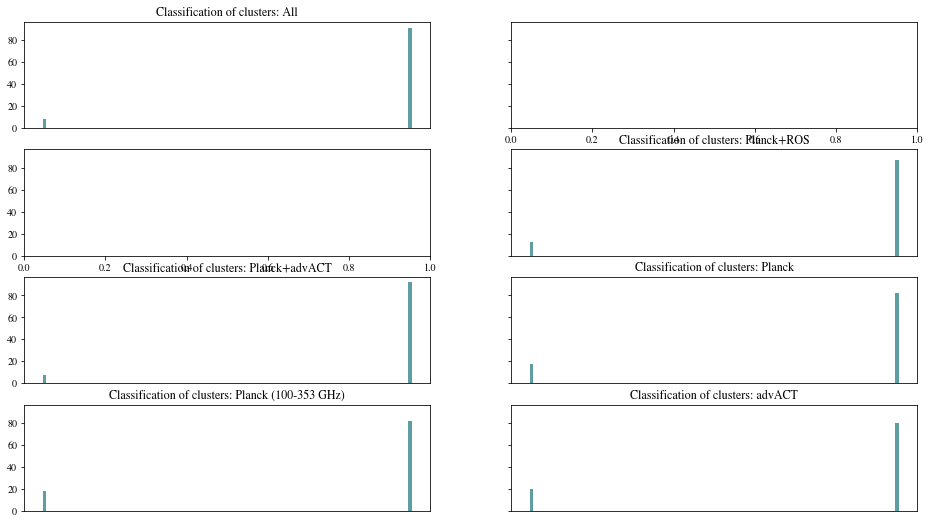

In [21]:
fig, ax = plt.subplots(4,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

# ax[0,1].hist(cluster_pl_ros_iris,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+IRIS+ROS')
# ax[0,1].get_xaxis().set_visible(False)
# ax[0,1].set_title("Classification of clusters: Planck+IRIS+ROS")

# ax[1,0].hist(cluster_pl_iris,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+IRIS')
# ax[1,0].get_xaxis().set_visible(False)
# ax[1,0].set_title("Classification of clusters: Planck+IRIS")

ax[1,1].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[2,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: Planck")

ax[3,0].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[3,0].get_xaxis().set_visible(False)
ax[3,0].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[3,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[3,1].get_xaxis().set_visible(False)
ax[3,1].set_title("Classification of clusters: advACT")

# plt.savefig('output/classification_510r .png')
plt.show()

In [22]:
# ACT-only
no_cluster_act = np.array([clf_act.predict([[i090,i090_r,i150,i150_r,i220,i220_r]]) for i090,i090_r,i150,i150_r,i220,i220_r in intensity_voids_act[1::2].values]).flatten()

# Low-freq Planck
no_cluster_pl_low = np.array([clf_pl_low.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r in intensity_voids_pl_low[1::2].values]).flatten()

# Planck-only
no_cluster_pl = np.array([clf_pl.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r in intensity_voids_pl[1::2].values]).flatten()

# Planck+ACT
no_cluster_pl_act = np.array([clf_pl_act.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,i090,i090_r,i150,i150_r,i220,i220_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,i090,i090_r,i150,i150_r,i220,i220_r in intensity_voids_pl_act[1::2].values]).flatten()

# Planck+ROSAT
no_cluster_pl_ros = np.array([clf_pl_ros.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_voids_pl_ros[1::2].values]).flatten()

# # Planck+IRIS
# no_cluster_pl_iris = np.array([clf_pl_iris.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r in intensity_voids_pl_iris[1::2].values]).flatten()

# # Planck+ROSAT+IRIS
# no_cluster_pl_ros_iris = np.array([clf_pl_ros_iris.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_voids_pl_ros_iris[1::2].values]).flatten()

# Full
no_cluster_full = np.array([clf_full.predict([[i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_voids_full[1::2].values]).flatten()

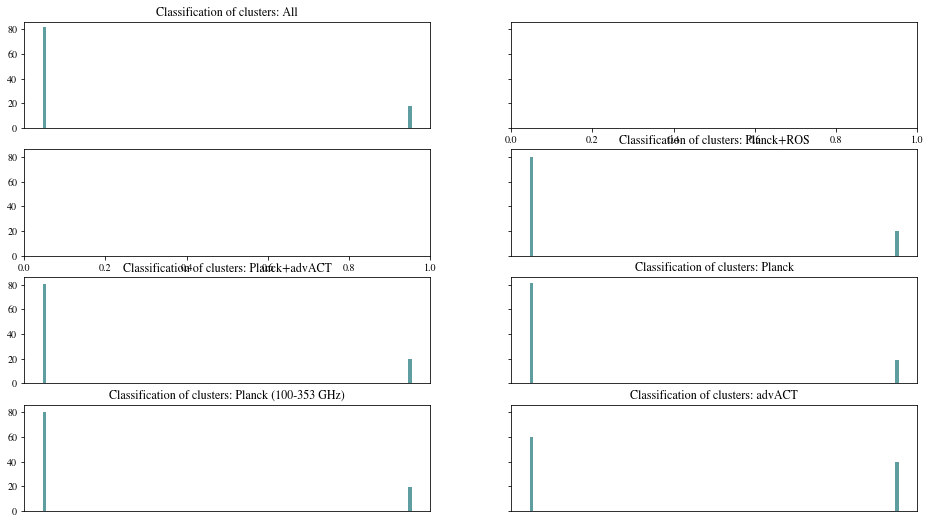

In [23]:
fig, ax = plt.subplots(4,2,figsize=(16,9),sharey=True)

ax[0,0].hist(no_cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

# ax[0,1].hist(no_cluster_pl_ros_iris,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+IRIS+ROS')
# ax[0,1].get_xaxis().set_visible(False)
# ax[0,1].set_title("Classification of clusters: Planck+IRIS+ROS")

# ax[1,0].hist(no_cluster_pl_iris,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+IRIS')
# ax[1,0].get_xaxis().set_visible(False)
# ax[1,0].set_title("Classification of clusters: Planck+IRIS")

ax[1,1].hist(no_cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(no_cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[2,1].hist(no_cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: Planck")

ax[3,0].hist(no_cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[3,0].get_xaxis().set_visible(False)
ax[3,0].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[3,1].hist(no_cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[3,1].get_xaxis().set_visible(False)
ax[3,1].set_title("Classification of clusters: advACT")

# plt.savefig('output/classification_510r .png')
plt.show()

In [43]:
len(no_cluster_pl_low[no_cluster_pl_low==0])/len(no_cluster_pl_low)

0.8050474254742548

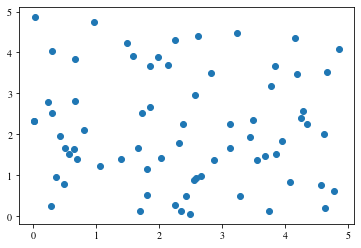

In [74]:
plt.scatter(df3[(df3.i090!=-9999) & (df3.amf_ra<5) & (df3.amf_dec>0) & (df3.amf_dec<5)]['amf_ra'],df3[(df3.i090!=-9999) & (df3.amf_ra<5) & (df3.amf_dec>0) & (df3.amf_dec<5)]['amf_dec'])

In [78]:
ras = []
decs = []
for ra in np.linspace(0,5,200):
    for dec in np.linspace(0,5,200):
        ras.append(ra)
        decs.append(dec)

In [80]:
dfsky = pd.DataFrame()#pd.read_csv('data/full_sky_decs.csv')[['decs']]
# dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]

c = SkyCoord(ras,decs,frame='icrs',unit='deg')
dfsky['glat'] = c.galactic.b.degree
dfsky['glon'] = c.galactic.l.degree

dfsky['i100'] = np.loadtxt('output/510u/pf100.csv',delimiter=', ')
dfsky['i143'] = np.loadtxt('output/510u/pf143.csv',delimiter=', ')
dfsky['i217'] = np.loadtxt('output/510u/pf217.csv',delimiter=', ')
dfsky['i353'] = np.loadtxt('output/510u/pf353.csv',delimiter=', ')
dfsky['i545'] = np.loadtxt('output/510u/pf545.csv',delimiter=', ')
dfsky['i857'] = np.loadtxt('output/510u/pf857.csv',delimiter=', ')
dfsky['i090'] = np.loadtxt('output/510u/af90.csv',delimiter=', ')
dfsky['i150'] = np.loadtxt('output/510u/af150.csv',delimiter=', ')
dfsky['i220'] = np.loadtxt('output/510u/af220.csv',delimiter=', ')
# dfsky['iros'] = np.loadtxt('output/510u/rf.csv',delimiter=', ')
dfsky['i100_r'] = np.loadtxt('output/510u/pf100_r.csv',delimiter=', ')
dfsky['i143_r'] = np.loadtxt('output/510u/pf143_r.csv',delimiter=', ')
dfsky['i217_r'] = np.loadtxt('output/510u/pf217_r.csv',delimiter=', ')
dfsky['i353_r'] = np.loadtxt('output/510u/pf353_r.csv',delimiter=', ')
dfsky['i545_r'] = np.loadtxt('output/510u/pf545.csv',delimiter=', ')
dfsky['i857_r'] = np.loadtxt('output/510u/pf857.csv',delimiter=', ')
dfsky['i090_r'] = np.loadtxt('output/510u/af90_r.csv',delimiter=', ')
dfsky['i150_r'] = np.loadtxt('output/510u/af150_r.csv',delimiter=', ')
dfsky['i220_r'] = np.loadtxt('output/510u/af220_r.csv',delimiter=', ')
# dfsky['iros_r'] = np.loadtxt('output/510u/rf_r.csv',delimiter=', ')
dfsky['cluster'] = 1

In [81]:
dfsky[~dfsky.isin([-9999]).any(axis=1)]

,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,...,i100_r,i143_r,i217_r,i353_r,i545_r,i857_r,i090_r,i150_r,i220_r,cluster
0,-60.188552,96.337283,0.000070,0.000059,0.000148,0.000858,0.007364,-0.006948,-62.875909,-35.841116,...,0.000087,0.000111,0.000198,0.000971,0.007364,-0.006948,-59.344921,-33.693123,65.718461,1
1,-60.165505,96.357406,0.000069,0.000055,0.000144,0.000842,0.007555,-0.003787,-72.394268,-44.317602,...,0.000087,0.000112,0.000200,0.000978,0.007555,-0.003787,-63.353540,-37.616544,50.185820,1
2,-60.142455,96.377499,0.000061,0.000050,0.000137,0.000825,0.005843,-0.002518,-83.691633,-53.486939,...,0.000091,0.000113,0.000202,0.000983,0.005843,-0.002518,-64.359430,-38.805562,34.970678,1
3,-60.119403,96.397565,0.000063,0.000050,0.000139,0.000823,0.003066,0.001495,-93.994229,-62.205246,...,0.000091,0.000111,0.000200,0.000979,0.003066,0.001495,-62.361953,-36.482445,18.702642,1
4,-60.096347,96.417603,0.000066,0.000052,0.000144,0.000826,-0.000167,0.005727,-101.060908,-67.748706,...,0.000091,0.000110,0.000198,0.000972,-0.000167,0.005727,-57.529367,-32.159361,3.884515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-57.083322,108.411982,0.000149,0.000141,0.000232,0.000708,-0.024118,-0.061215,12.987002,-43.024574,...,0.000133,0.000123,0.000204,0.000750,-0.024118,-0.061215,34.920092,-14.155511,374.938970,1
39996,-57.058834,108.422330,0.000153,0.000143,0.000234,0.000729,-0.024589,-0.068005,22.162560,-31.157171,...,0.000134,0.000126,0.000207,0.000752,-0.024589,-0.068005,34.523698,-12.338707,380.270473,1
39997,-57.034345,108.432665,0.000157,0.000146,0.000237,0.000753,-0.023980,-0.073031,31.773821,-18.598876,...,0.000135,0.000128,0.000209,0.000751,-0.023980,-0.073031,33.955688,-10.988466,362.124686,1
39998,-57.009856,108.442985,0.000156,0.000148,0.000239,0.000779,-0.019070,-0.066774,41.055356,-6.225083,...,0.000137,0.000128,0.000210,0.000744,-0.019070,-0.066774,33.596038,-10.516796,337.942658,1


In [88]:
dfsky.loc[:,'i100':'i220_r']

,i100,i143,i217,i353,i545,i857,i090,i150,i220,i100_r,i143_r,i217_r,i353_r,i545_r,i857_r,i090_r,i150_r,i220_r
0,0.000070,0.000059,0.000148,0.000858,0.007364,-0.006948,-62.875909,-35.841116,114.594498,0.000087,0.000111,0.000198,0.000971,0.007364,-0.006948,-59.344921,-33.693123,65.718461
1,0.000069,0.000055,0.000144,0.000842,0.007555,-0.003787,-72.394268,-44.317602,93.778526,0.000087,0.000112,0.000200,0.000978,0.007555,-0.003787,-63.353540,-37.616544,50.185820
2,0.000061,0.000050,0.000137,0.000825,0.005843,-0.002518,-83.691633,-53.486939,68.381927,0.000091,0.000113,0.000202,0.000983,0.005843,-0.002518,-64.359430,-38.805562,34.970678
3,0.000063,0.000050,0.000139,0.000823,0.003066,0.001495,-93.994229,-62.205246,41.414871,0.000091,0.000111,0.000200,0.000979,0.003066,0.001495,-62.361953,-36.482445,18.702642
4,0.000066,0.000052,0.000144,0.000826,-0.000167,0.005727,-101.060908,-67.748706,14.706797,0.000091,0.000110,0.000198,0.000972,-0.000167,0.005727,-57.529367,-32.159361,3.884515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.000149,0.000141,0.000232,0.000708,-0.024118,-0.061215,12.987002,-43.024574,338.991112,0.000133,0.000123,0.000204,0.000750,-0.024118,-0.061215,34.920092,-14.155511,374.938970
39996,0.000153,0.000143,0.000234,0.000729,-0.024589,-0.068005,22.162560,-31.157171,344.962478,0.000134,0.000126,0.000207,0.000752,-0.024589,-0.068005,34.523698,-12.338707,380.270473
39997,0.000157,0.000146,0.000237,0.000753,-0.023980,-0.073031,31.773821,-18.598876,356.307893,0.000135,0.000128,0.000209,0.000751,-0.023980,-0.073031,33.955688,-10.988466,362.124686
39998,0.000156,0.000148,0.000239,0.000779,-0.019070,-0.066774,41.055356,-6.225083,367.103936,0.000137,0.000128,0.000210,0.000744,-0.019070,-0.066774,33.596038,-10.516796,337.942658


In [89]:
cluster_pl_act = np.array([clf_pl_act.predict([[i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r]]) for i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r in dfsky.loc[:,'i100':'i220_r'].values]).flatten()

In [113]:
dfsky['cluster']=cluster_prob

In [91]:
pl143 = hp.read_map('data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits')

In [96]:
dfsky[dfsky.cluster==0]

,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,...,i100_r,i143_r,i217_r,i353_r,i545_r,i857_r,i090_r,i150_r,i220_r,cluster


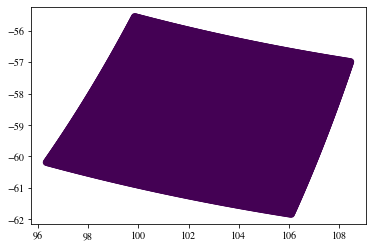

In [94]:
plt.scatter(dfsky['glon'],dfsky['glat'],c=dfsky.cluster)
plt.scatter()

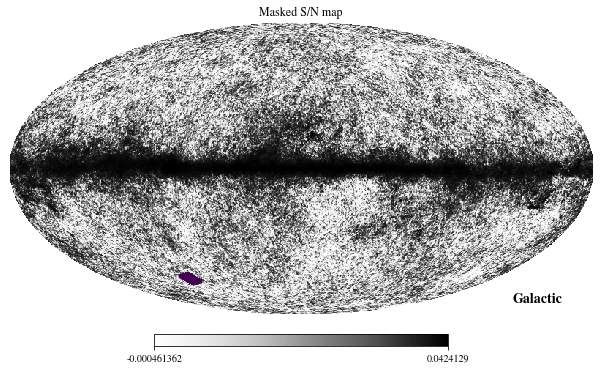

In [92]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(df['glon'],df['glat'],c='red',lonlat=True,s=0.01)
# hp.visufunc.projscatter(df2['glon'],df2['glat'],c='blue',lonlat=True,s=0.01)
hp.visufunc.projscatter(dfsky['glon'],dfsky['glat'],lonlat=True,c=dfsky.cluster,s=5)
# hp.visufunc.projscatter(dfsky[dfsky.cluster<0.5]['glon'],dfsky[dfsky.cluster<0.5]['glat'],lonlat=True,c="darkblue",s=5)
# hp.visufunc.projscatter(dfsky[dfsky.cluster>0.5]['glon'],dfsky[dfsky.cluster>0.5]['glat'],lonlat=True,c="magenta",s=5)
plt.scatter(dfsky['glon'],dfsky['glat'],c=dfsky.cluster,alpha=0,s=1)
# plt.scatter(df['glon'],df['glat'],c='r',s=1)
plt.savefig('output/fullsky_r.png')

# RETRY USING INTERSECTION SVM 

---

---

---

----

# Beam

In [116]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df['i100'] = np.loadtxt('output/beam/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/beam/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/beam/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/beam/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/beam/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/beam/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/beam/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/beam/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/beam/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/beam/rr.csv',delimiter=', ')
df['cluster'] = 1

In [117]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/beam/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/beam/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/beam/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/beam/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/beam/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/beam/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/beam/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/beam/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/beam/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/beam/rv.csv',delimiter=', ')
df2['cluster'] = 0

In [118]:
df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

In [119]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

###################################################

# Planck low-freq
intensity_clusters_pl_low = df[['i100','i143','i217','i353']][::2]
intensity_voids_pl_low = df2[['i100','i143','i217','i353']][::2]
intensity_combined_pl_low = df3[['i100','i143','i217','i353']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['i100','i143','i217','i353','i545','i857']][::2]
intensity_voids_pl = df2[['i100','i143','i217','i353','i545','i857']][::2]
intensity_combined_pl = df3[['i100','i143','i217','i353','i545','i857']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
intensity_voids_pl_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
intensity_combined_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
cluster_tag_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
intensity_voids_pl_ros = df2[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
intensity_combined_pl_ros = df3[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

########################################################################################################

# Full
intensity_clusters_full = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
intensity_voids_full = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
intensity_combined_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
cluster_tag_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [120]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090, i150, i220]]) for i090, i150, i220 in intensity_clusters_act[1::2].values]).flatten()

# Low-freq Planck
cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_clusters_pl_low[1::2].values]).flatten()

# Planck-only
cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters_pl[1::2].values]).flatten()

# Planck+ACT
cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_clusters_pl_act[1::2].values]).flatten()

# Planck+ROSAT
cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters_pl_ros[1::2].values]).flatten()

# Full
cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters_full[1::2].values]).flatten()

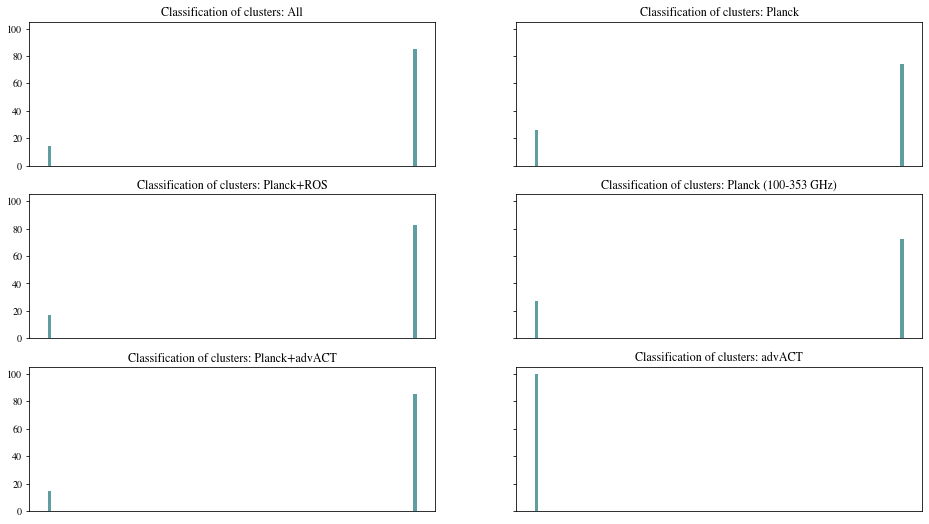

In [121]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

ax[1,0].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[0,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of clusters: Planck")

ax[1,1].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[2,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: advACT")

plt.savefig('output/classification_beam.png')
plt.show()

---

---

---

----

# Beam + Ring

In [78]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df['i100'] = np.loadtxt('output/beam/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/beam/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/beam/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/beam/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/beam/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/beam/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/beam/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/beam/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/beam/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/beam/rr.csv',delimiter=', ')
df['i100_r'] = np.loadtxt('output/beam/pr100_r.csv',delimiter=', ')
df['i143_r'] = np.loadtxt('output/beam/pr143_r.csv',delimiter=', ')
df['i217_r'] = np.loadtxt('output/beam/pr217_r.csv',delimiter=', ')
df['i353_r'] = np.loadtxt('output/beam/pr353_r.csv',delimiter=', ')
df['i545_r'] = np.loadtxt('output/beam/pr545_r.csv',delimiter=', ')
df['i857_r'] = np.loadtxt('output/beam/pr857_r.csv',delimiter=', ')
df['i090_r'] = np.loadtxt('output/beam/ar90_r.csv',delimiter=', ')
df['i150_r'] = np.loadtxt('output/beam/ar150_r.csv',delimiter=', ')
df['i220_r'] = np.loadtxt('output/beam/ar220_r.csv',delimiter=', ')
df['iros_r'] = np.loadtxt('output/beam/rr_r.csv',delimiter=', ')
df['cluster'] = 1

In [79]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/beam/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/beam/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/beam/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/beam/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/beam/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/beam/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/beam/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/beam/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/beam/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/beam/rv.csv',delimiter=', ')
df2['i100_r'] = np.loadtxt('output/beam/pv100_r.csv',delimiter=', ')
df2['i143_r'] = np.loadtxt('output/beam/pv143_r.csv',delimiter=', ')
df2['i217_r'] = np.loadtxt('output/beam/pv217_r.csv',delimiter=', ')
df2['i353_r'] = np.loadtxt('output/beam/pv353_r.csv',delimiter=', ')
df2['i545_r'] = np.loadtxt('output/beam/pv545_r.csv',delimiter=', ')
df2['i857_r'] = np.loadtxt('output/beam/pv857_r.csv',delimiter=', ')
df2['i090_r'] = np.loadtxt('output/beam/av90_r.csv',delimiter=', ')
df2['i150_r'] = np.loadtxt('output/beam/av150_r.csv',delimiter=', ')
df2['i220_r'] = np.loadtxt('output/beam/av220_r.csv',delimiter=', ')
df2['iros_r'] = np.loadtxt('output/beam/rv_r.csv',delimiter=', ')
df2['cluster'] = 0

In [80]:
df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

In [81]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

###################################################

# Planck low-freq
intensity_clusters_pl_low = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
intensity_voids_pl_low = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
intensity_combined_pl_low = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
intensity_voids_pl = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
intensity_combined_pl = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
intensity_voids_pl_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
intensity_combined_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
cluster_tag_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_voids_pl_ros = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_combined_pl_ros = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

########################################################################################################

# Full
intensity_clusters_full = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_voids_full = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_combined_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
cluster_tag_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [82]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090,i090_r,i150,i150_r,i220,i220_r]]) for i090,i090_r,i150,i150_r,i220,i220_r in intensity_clusters_act[1::2].values]).flatten()

# Low-freq Planck
cluster_pl_low = np.array([clf_pl_low.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r in intensity_clusters_pl_low[1::2].values]).flatten()

# Planck-only
cluster_pl = np.array([clf_pl.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r in intensity_clusters_pl[1::2].values]).flatten()

# Planck+ACT
cluster_pl_act = np.array([clf_pl_act.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,i090,i090_r,i150,i150_r,i220,i220_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,i090,i090_r,i150,i150_r,i220,i220_r in intensity_clusters_pl_act[1::2].values]).flatten()

# Planck+ROSAT
cluster_pl_ros = np.array([clf_pl_ros.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_clusters_pl_ros[1::2].values]).flatten()

# Full
cluster_full = np.array([clf_full.predict([[i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_clusters_full[1::2].values]).flatten()

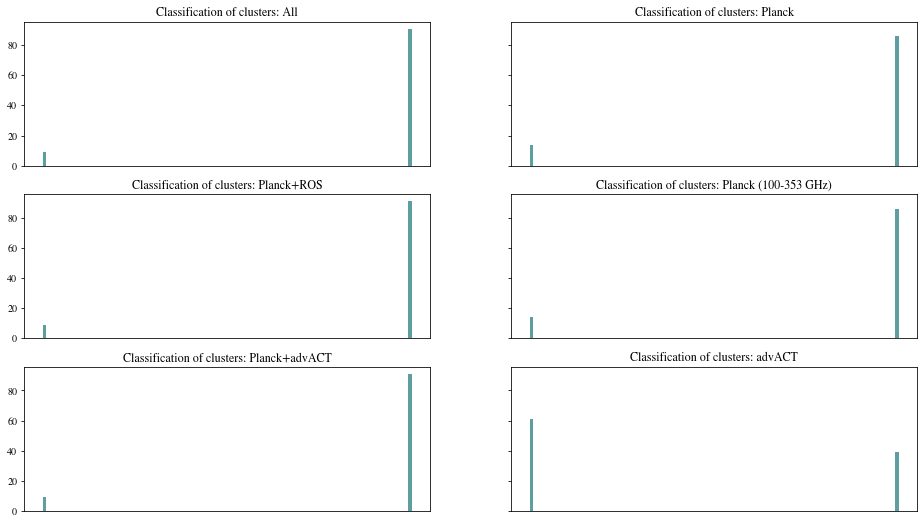

In [83]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

ax[1,0].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[0,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of clusters: Planck")

ax[1,1].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[2,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: advACT")

plt.savefig('output/classification_beamr.png')
plt.show()

---

---

---

----

# Double beam

In [122]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df['i100'] = np.loadtxt('output/doublebeam/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/doublebeam/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/doublebeam/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/doublebeam/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/doublebeam/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/doublebeam/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/doublebeam/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/doublebeam/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/doublebeam/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/doublebeam/rr.csv',delimiter=', ')
df['cluster'] = 1

In [123]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/doublebeam/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/doublebeam/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/doublebeam/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/doublebeam/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/doublebeam/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/doublebeam/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/doublebeam/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/doublebeam/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/doublebeam/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/doublebeam/rv.csv',delimiter=', ')
df2['cluster'] = 0

In [124]:
df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

In [125]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

###################################################

# Planck low-freq
intensity_clusters_pl_low = df[['i100','i143','i217','i353']][::2]
intensity_voids_pl_low = df2[['i100','i143','i217','i353']][::2]
intensity_combined_pl_low = df3[['i100','i143','i217','i353']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['i100','i143','i217','i353','i545','i857']][::2]
intensity_voids_pl = df2[['i100','i143','i217','i353','i545','i857']][::2]
intensity_combined_pl = df3[['i100','i143','i217','i353','i545','i857']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
intensity_voids_pl_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
intensity_combined_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
cluster_tag_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
intensity_voids_pl_ros = df2[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
intensity_combined_pl_ros = df3[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

########################################################################################################

# Full
intensity_clusters_full = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
intensity_voids_full = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
intensity_combined_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
cluster_tag_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [126]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090, i150, i220]]) for i090, i150, i220 in intensity_clusters_act[1::2].values]).flatten()

# Low-freq Planck
cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_clusters_pl_low[1::2].values]).flatten()

# Planck-only
cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters_pl[1::2].values]).flatten()

# Planck+ACT
cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_clusters_pl_act[1::2].values]).flatten()

# Planck+ROSAT
cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters_pl_ros[1::2].values]).flatten()

# Full
cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters_full[1::2].values]).flatten()

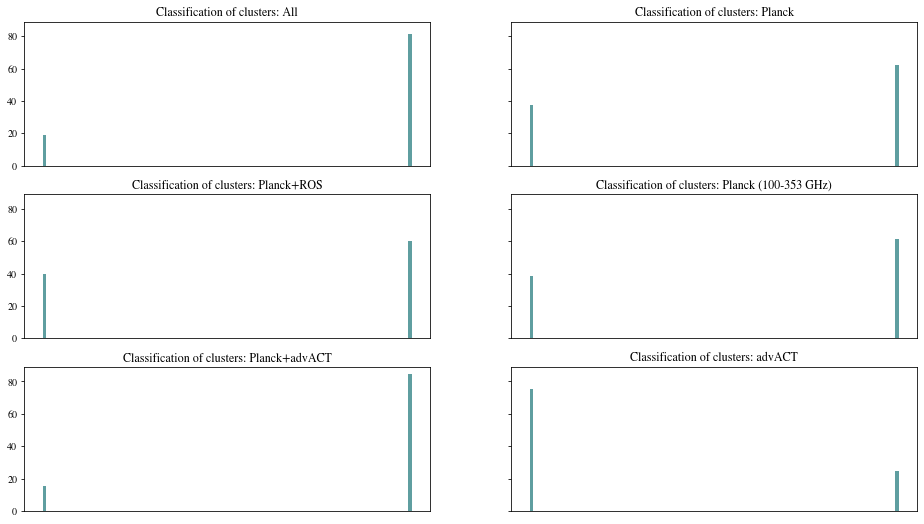

In [127]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

ax[1,0].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[0,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of clusters: Planck")

ax[1,1].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[2,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: advACT")

plt.savefig('output/classification_doublebeam.png')
plt.show()

---

---

---

----

# Double beam + Ring

In [90]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df['i100'] = np.loadtxt('output/doublebeam/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/doublebeam/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/doublebeam/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/doublebeam/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/doublebeam/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/doublebeam/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/doublebeam/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/doublebeam/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/doublebeam/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/doublebeam/rr.csv',delimiter=', ')
df['i100_r'] = np.loadtxt('output/doublebeam/pr100_r.csv',delimiter=', ')
df['i143_r'] = np.loadtxt('output/doublebeam/pr143_r.csv',delimiter=', ')
df['i217_r'] = np.loadtxt('output/doublebeam/pr217_r.csv',delimiter=', ')
df['i353_r'] = np.loadtxt('output/doublebeam/pr353_r.csv',delimiter=', ')
df['i545_r'] = np.loadtxt('output/doublebeam/pr545_r.csv',delimiter=', ')
df['i857_r'] = np.loadtxt('output/doublebeam/pr857_r.csv',delimiter=', ')
df['i090_r'] = np.loadtxt('output/doublebeam/ar90_r.csv',delimiter=', ')
df['i150_r'] = np.loadtxt('output/doublebeam/ar150_r.csv',delimiter=', ')
df['i220_r'] = np.loadtxt('output/doublebeam/ar220_r.csv',delimiter=', ')
df['iros_r'] = np.loadtxt('output/doublebeam/rr_r.csv',delimiter=', ')
df['cluster'] = 1

In [91]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/doublebeam/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/doublebeam/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/doublebeam/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/doublebeam/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/doublebeam/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/doublebeam/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/doublebeam/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/doublebeam/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/doublebeam/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/doublebeam/rv.csv',delimiter=', ')
df2['i100_r'] = np.loadtxt('output/doublebeam/pv100_r.csv',delimiter=', ')
df2['i143_r'] = np.loadtxt('output/doublebeam/pv143_r.csv',delimiter=', ')
df2['i217_r'] = np.loadtxt('output/doublebeam/pv217_r.csv',delimiter=', ')
df2['i353_r'] = np.loadtxt('output/doublebeam/pv353_r.csv',delimiter=', ')
df2['i545_r'] = np.loadtxt('output/doublebeam/pv545_r.csv',delimiter=', ')
df2['i857_r'] = np.loadtxt('output/doublebeam/pv857_r.csv',delimiter=', ')
df2['i090_r'] = np.loadtxt('output/doublebeam/av90_r.csv',delimiter=', ')
df2['i150_r'] = np.loadtxt('output/doublebeam/av150_r.csv',delimiter=', ')
df2['i220_r'] = np.loadtxt('output/doublebeam/av220_r.csv',delimiter=', ')
df2['iros_r'] = np.loadtxt('output/doublebeam/rv_r.csv',delimiter=', ')
df2['cluster'] = 0

In [92]:
df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

In [93]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

###################################################

# Planck low-freq
intensity_clusters_pl_low = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
intensity_voids_pl_low = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
intensity_combined_pl_low = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
intensity_voids_pl = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
intensity_combined_pl = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
intensity_voids_pl_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
intensity_combined_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
cluster_tag_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_voids_pl_ros = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_combined_pl_ros = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

########################################################################################################

# Full
intensity_clusters_full = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_voids_full = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_combined_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
cluster_tag_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [94]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090,i090_r,i150,i150_r,i220,i220_r]]) for i090,i090_r,i150,i150_r,i220,i220_r in intensity_clusters_act[1::2].values]).flatten()

# Low-freq Planck
cluster_pl_low = np.array([clf_pl_low.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r in intensity_clusters_pl_low[1::2].values]).flatten()

# Planck-only
cluster_pl = np.array([clf_pl.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r in intensity_clusters_pl[1::2].values]).flatten()

# Planck+ACT
cluster_pl_act = np.array([clf_pl_act.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,i090,i090_r,i150,i150_r,i220,i220_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,i090,i090_r,i150,i150_r,i220,i220_r in intensity_clusters_pl_act[1::2].values]).flatten()

# Planck+ROSAT
cluster_pl_ros = np.array([clf_pl_ros.predict([[i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i100,i100_r,i143,i143_r,i217,i217_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_clusters_pl_ros[1::2].values]).flatten()

# Full
cluster_full = np.array([clf_full.predict([[i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r]]) for i090,i090_r,i100,i100_r,i143,i143_r,i150,i150_r,i217,i217_r,i220,i220_r,i353,i353_r,i545,i545_r,i857,i857_r,irosat,irosat_r in intensity_clusters_full[1::2].values]).flatten()

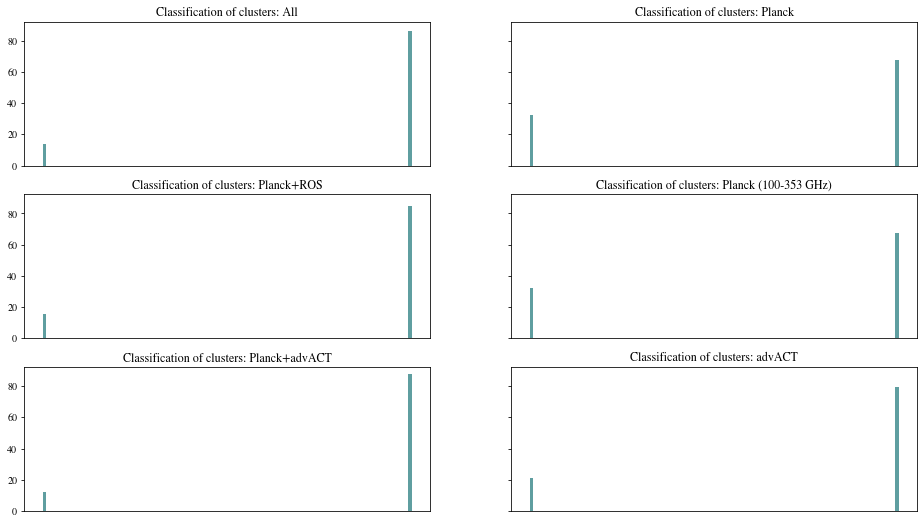

In [95]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

ax[1,0].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[0,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of clusters: Planck")

ax[1,1].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[2,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: advACT")

plt.savefig('output/classification_doublebeamr.png')
plt.show()

---

---

---

----

# Beam

In [102]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df = df[(df.amf_z>0.32) & (df.amf_rh>27)]
# df['i100'] = np.loadtxt('output/beam/pr100.csv',delimiter=', ')
# df['i143'] = np.loadtxt('output/beam/pr143.csv',delimiter=', ')
# df['i217'] = np.loadtxt('output/beam/pr217.csv',delimiter=', ')
# df['i353'] = np.loadtxt('output/beam/pr353.csv',delimiter=', ')
# df['i545'] = np.loadtxt('output/beam/pr545.csv',delimiter=', ')
# df['i857'] = np.loadtxt('output/beam/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/beamb/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/beamb/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/beamb/ar220.csv',delimiter=', ')
# df['iros'] = np.loadtxt('output/beam/rr.csv',delimiter=', ')
df['cluster'] = 1

In [103]:
df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/beam/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/beam/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/beam/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/beam/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/beam/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/beam/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/beam/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/beam/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/beam/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/beam/rv.csv',delimiter=', ')
df2['cluster'] = 0

In [104]:
df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

In [106]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i150','i220']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

# ###################################################

# # Planck low-freq
# intensity_clusters_pl_low = df[['i100','i143','i217','i353']][::2]
# intensity_voids_pl_low = df2[['i100','i143','i217','i353']][::2]
# intensity_combined_pl_low = df3[['i100','i143','i217','i353']][::2]
# cluster_tag_pl_low = df3['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

# #################################################################################################

# # Planck-only
# intensity_clusters_pl = df[['i100','i143','i217','i353','i545','i857']][::2]
# intensity_voids_pl = df2[['i100','i143','i217','i353','i545','i857']][::2]
# intensity_combined_pl = df3[['i100','i143','i217','i353','i545','i857']][::2]
# cluster_tag_pl = df3['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

# #####################################################################################################

# # Planck+ACT
# intensity_clusters_pl_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
# intensity_voids_pl_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
# intensity_combined_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i100','i143','i217','i353','i545','i857', 'i090', 'i150', 'i220']][::2]
# cluster_tag_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

# ##########################################################################################################

# # Planck+ROSAT
# intensity_clusters_pl_ros = df[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
# intensity_voids_pl_ros = df2[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
# intensity_combined_pl_ros = df3[['i100','i143','i217','i353','i545','i857', 'iros']][::2]
# cluster_tag_pl_ros = df3['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

# ########################################################################################################

# # Full
# intensity_clusters_full = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
# intensity_voids_full = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
# intensity_combined_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i100','i143','i150','i217','i220','i353','i545','i857','iros']][::2]
# cluster_tag_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# # Fit full sample with their associated classficiation
# clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [107]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090, i150, i220]]) for i090, i150, i220 in intensity_clusters_act[1::2].values]).flatten()

# # Low-freq Planck
# cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_clusters_pl_low[1::2].values]).flatten()

# # Planck-only
# cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters_pl[1::2].values]).flatten()

# # Planck+ACT
# cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_clusters_pl_act[1::2].values]).flatten()

# # Planck+ROSAT
# cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters_pl_ros[1::2].values]).flatten()

# # Full
# cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters_full[1::2].values]).flatten()

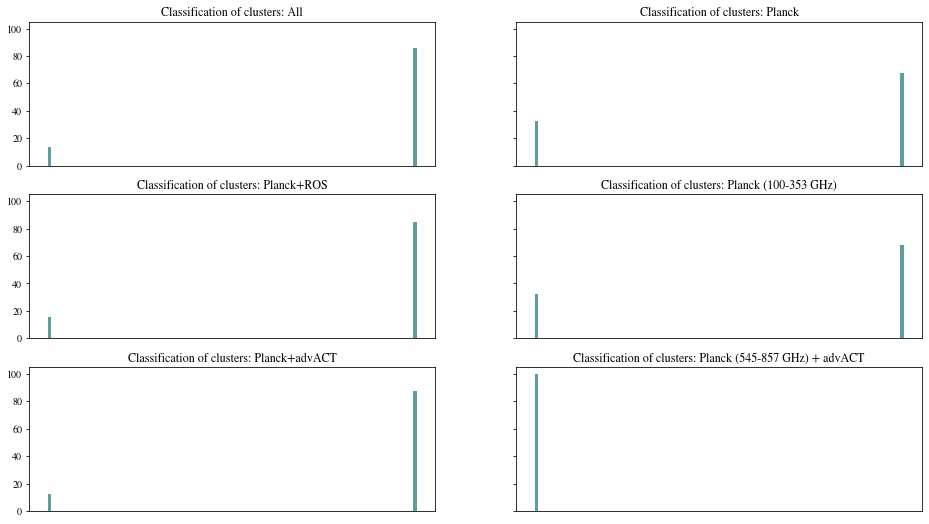

In [108]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

ax[1,0].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[0,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of clusters: Planck")

ax[1,1].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[2,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: Planck (545-857 GHz) + advACT")

plt.savefig('output/classification_beam.png')
plt.show()

---

---

---

----

In [51]:
m1 = 1
m2 = 2
v1 = 150
v2 = -250

vcm = (m1*v1+m2*v2)/(m1+m2)
dvabs = np.sqrt((v1-v2)**2)
fac1 = -1*m2/(m1+m2)
fac2 = m1/(m1+m2)

In [58]:
print(vcm, fac1, dvabs)
print(vcm+(fac1*dvabs))

-116.66666666666667 -0.6666666666666666 400.0
-383.3333333333333


In [53]:
vcm+(fac2*dvabs)

16.666666666666643

In [54]:
vcm

-116.66666666666667

In [55]:
fac1

-0.6666666666666666

In [56]:
fac2

0.3333333333333333

In [57]:
dvabs

400.0

In [ ]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i090_r','i150','i150_r','i220','i220_r']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

###################################################

# Planck low-freq
intensity_clusters_pl_low = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
intensity_voids_pl_low = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
intensity_combined_pl_low = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
intensity_voids_pl = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
intensity_combined_pl = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
intensity_voids_pl_act = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
intensity_combined_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i090','i090_r','i150','i150_r','i220','i220_r']][::2]
cluster_tag_pl_act = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_voids_pl_ros = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
intensity_combined_pl_ros = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

##########################################################################################################

# Planck+IRIS
intensity_clusters_pl_iris = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
intensity_voids_pl_iris = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
intensity_combined_pl_iris = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
cluster_tag_pl_iris = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_iris = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_iris.fit(intensity_combined_pl_iris, cluster_tag_pl_iris)

##########################################################################################################

# Planck+ROSAT+IRIS
intensity_clusters_pl_ros_iris = df[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
intensity_voids_pl_ros_iris = df2[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
intensity_combined_pl_ros_iris = df3[['i100','i100_r','i143','i143_r','i217','i217_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
cluster_tag_pl_ros_iris = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros_iris = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros_iris.fit(intensity_combined_pl_ros_iris, cluster_tag_pl_ros_iris)

########################################################################################################

# Full
intensity_clusters_full = df[(df.i090!=-9999)&(df.i150!=-9999)&(df.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
intensity_voids_full = df2[(df2.i090!=-9999)&(df2.i150!=-9999)&(df2.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
intensity_combined_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)][['i090','i090_r','i100','i100_r','i143','i143_r','i150','i150_r','i217','i217_r','i220','i220_r','i353','i353_r','i545','i545_r','i857','i857_r','iros','iros_r','i12','i25','i60','i100','i12_r','i25_r','i60_r','i100_r']][::2]
cluster_tag_full = df3[(df3.i090!=-9999)&(df3.i150!=-9999)&(df3.i220!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)